<a href="https://colab.research.google.com/github/Saritha199/CODSOFT/blob/machine-learning/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **CUSTOMER CHURN PREDICTION**


**Overview**

   This project aims to predict whether a bank's customers will churn (i.e., leave the bank) based on various customer attributes. Customer churn is a critical issue in the banking industry as retaining existing customers is often more cost-effective than acquiring new ones.

**Objectives**



Data Preprocessing: Clean and prepare the dataset for modeling.
Exploratory Data Analysis: Understand the data distribution and relationships between features.
Feature Engineering: Create new features that may help improve model performance.
Model Building: Train and evaluate different machine learning models to predict customer churn.
Model Evaluation: Assess the performance of the models using appropriate metrics and visualization techniques.
Model Deployment: Save the best-performing model for future use.

**Data Description**

The dataset used in this project is the "Churn_Modelling.csv" file, which contains the following attributes:


*   CustomerId: Unique identifier for each customer.
*   Surname: Customer's last name.


*   CreditScore: Customer's credit score.

*   Geography: Country of the customer.
*   Gender: Gender of the customer.


*   Age: Age of the customer.
*   Tenure: Number of years the customer has been with the bank.
*   Balance: Account balance of the customer.
*   NumOfProducts: Number of products the customer has with the bank.
*   HasCrCard: Whether the customer has a credit card (1: Yes, 0: No).
*   IsActiveMember: Whether the customer is an active member (1: Yes, 0: No).
*   EstimatedSalary: Estimated salary of the customer.
*   Exited: Whether the customer has churned (1: Yes, 0: No).










In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#create dataframe
df = pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#printing head and tail of dataset to get the overview of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
#identifying missing values
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
#check for datatypes
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
#dropping irrelevent colums
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace = True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#check for class imbalance
#target class count
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


percentage of 0 and 1


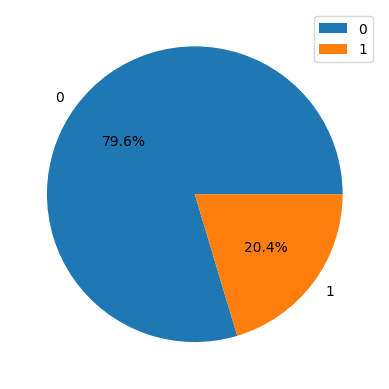

In [ ]:
# percentage of class present in target variable(Exited)
print("percentage of 0 and 1")
labels=[0,1]
plt.pie(df['Exited'].value_counts(),labels=labels,autopct='%1.1f%%')
plt.legend(df['Exited'].value_counts().index)

In [ ]:
 #checking duplicate entries
print("Duplicate entries:", df.duplicated().sum())

Duplicate entries: 0


In [ ]:
#Encoding using get dummies
df1 = pd.get_dummies(df[['Geography', 'Gender']], drop_first=True)
df1 = df1.astype(int)
df1


,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
9995,0,0,1
9996,0,0,1
9997,0,0,0
9998,1,0,1


In [ ]:
dfe = pd.concat([df, df1], axis=1)
dfe

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
dfe.drop(['Geography', 'Gender'], axis=1, inplace=True)
dfe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
corr=dfe.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


<Axes: >

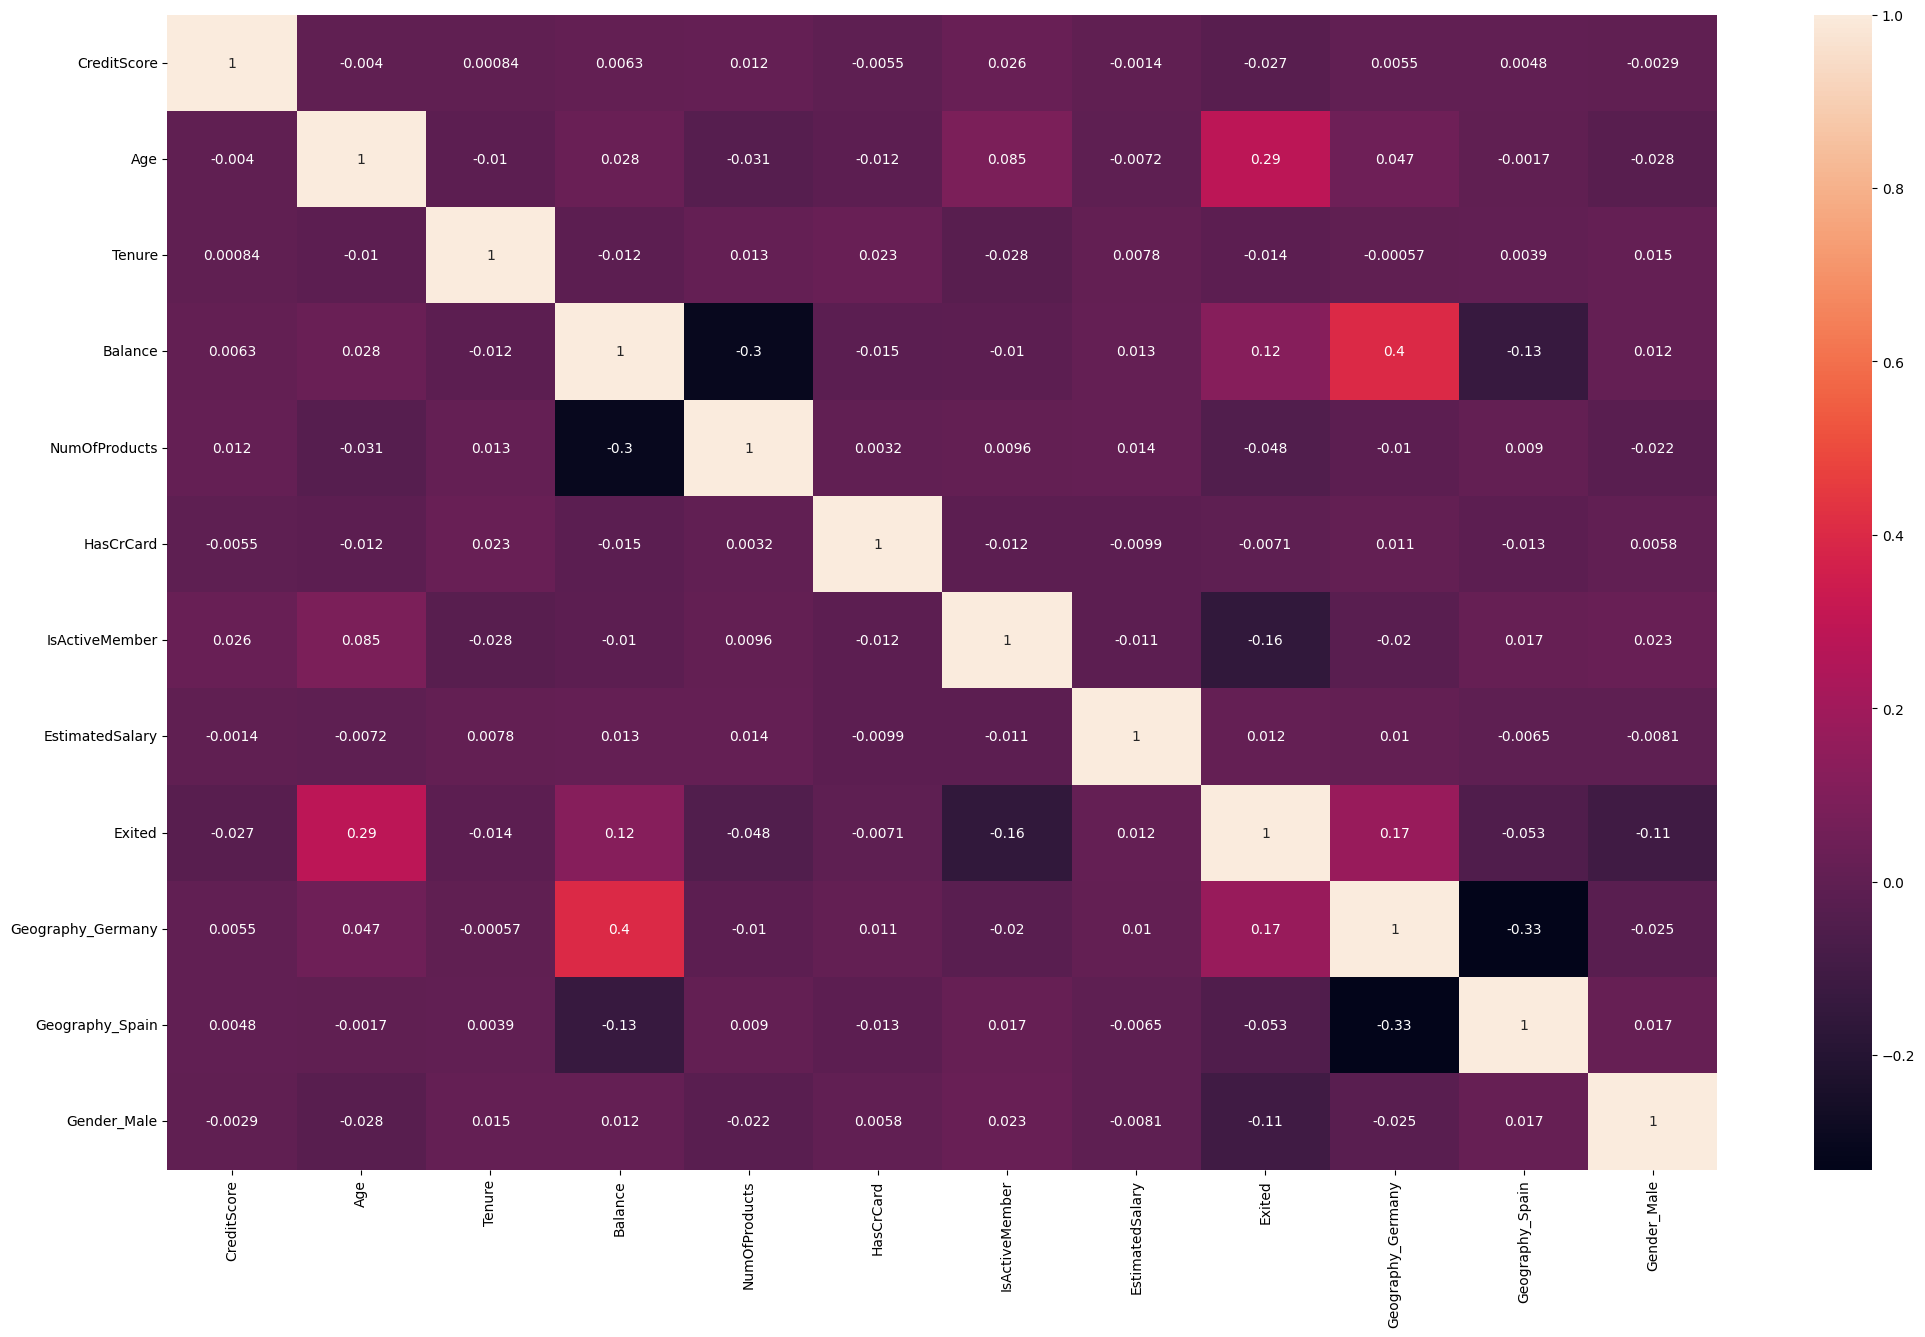

In [ ]:
#Drawing a heatmap in order to find out the correlation
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True)

In [ ]:
columns=dfe.columns[dfe.columns !='Exited']
columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

<Axes: >

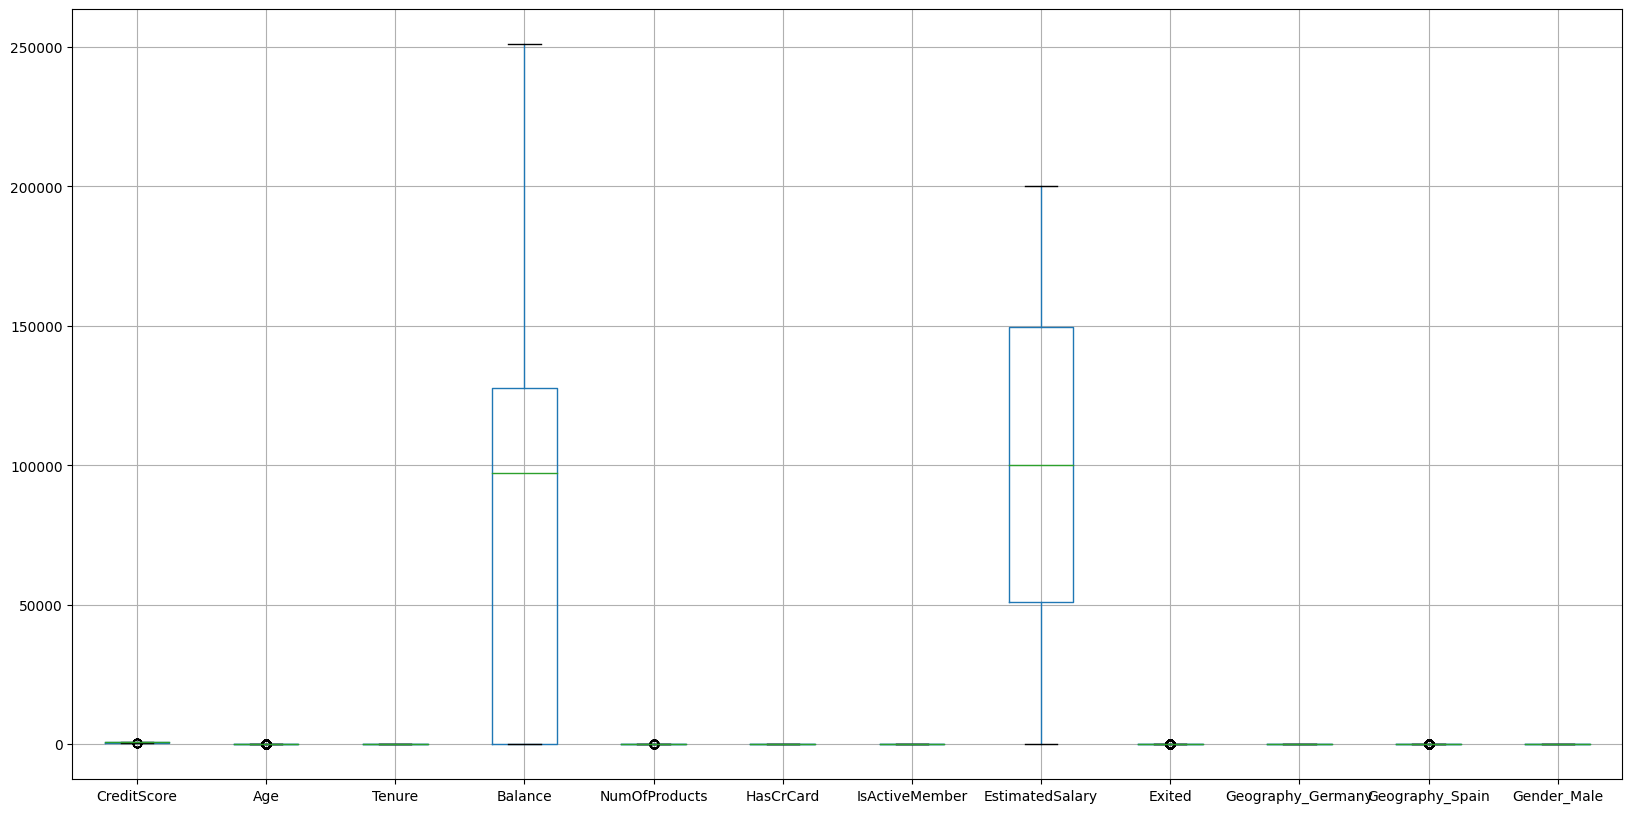

In [ ]:
#plotting boxplot inorder to findout outlayers
plt.figure(figsize=(20,10))
dfe.boxplot()


In [ ]:
#Removing outlayers using IQR method
def iqr_rem(df,cols):
  for col in cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    upper_bound=q3+1.5*IQR
    lower_bound=q1-1.5*IQR
    df[col]=df[col].clip(lower_bound,upper_bound)
iqr_rem(dfe,columns)

<Axes: >

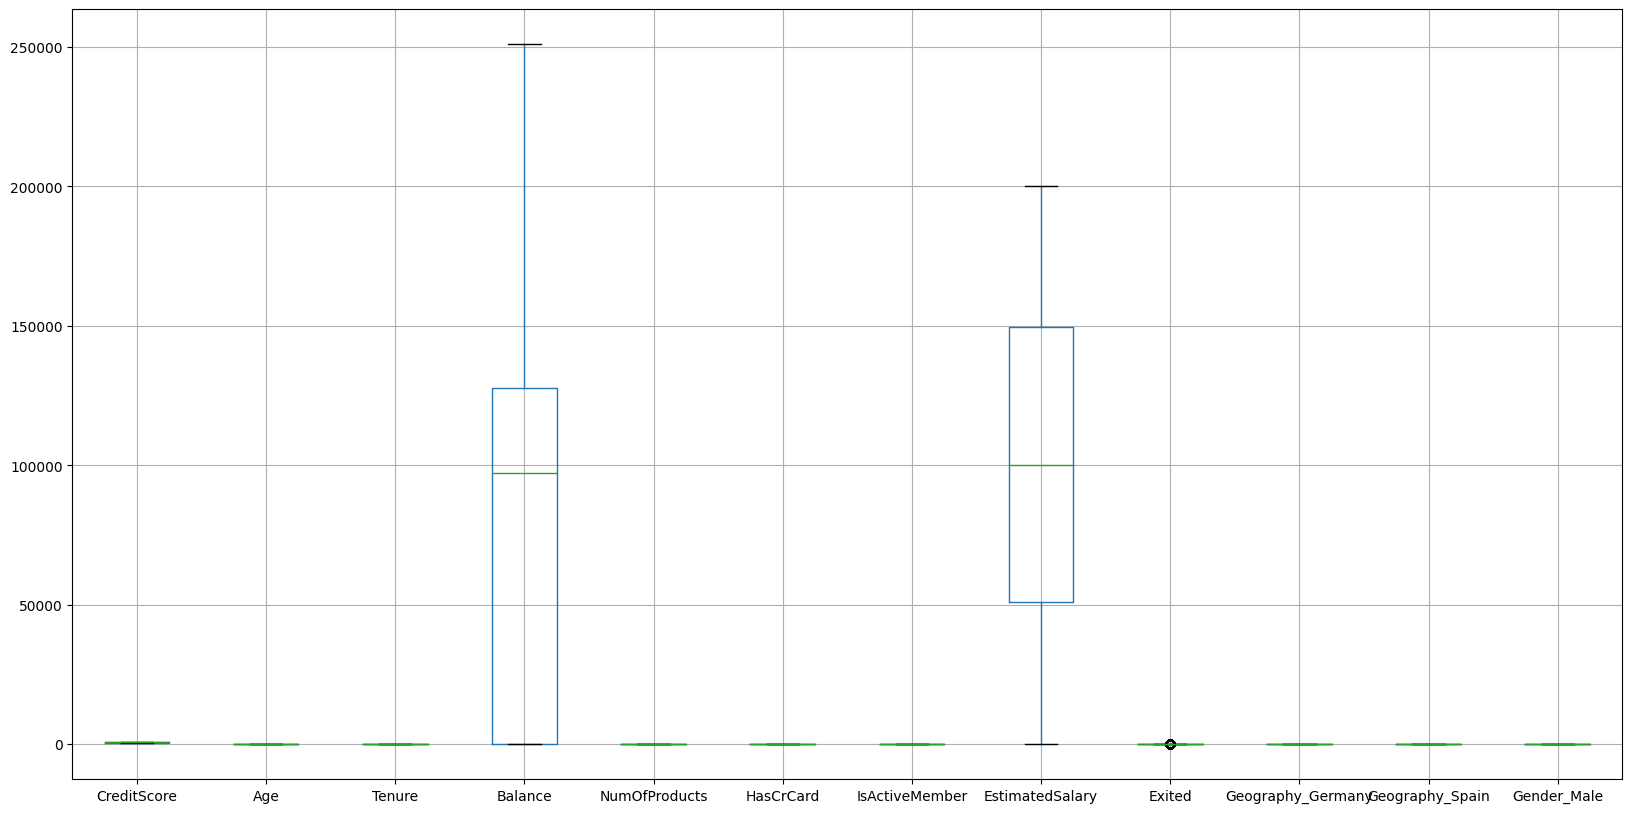

In [ ]:
# #plotting boxplot inorder to findout outlayers
plt.figure(figsize=(20,10))
dfe.boxplot()

In [ ]:
#seperating x and y
x=dfe.drop(['Exited'],axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1.0,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1.0,0,1,112542.58,0,0,0
2,502,42,8,159660.80,3.0,1,0,113931.57,0,0,0
3,699,39,1,0.00,2.0,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1.0,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2.0,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1.0,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1.0,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2.0,1,0,92888.52,1,0,1


In [ ]:
y=df['Exited']


In [ ]:
#splitting input and output into train test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=42,test_size=0.30)

In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
#model creation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
lr=LogisticRegression()
dec=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')
xgb = XGBClassifier()
lst=[lr,dec,rf,xgb]

model is LogisticRegression()
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2416
           1       0.61      0.24      0.34       584

    accuracy                           0.82      3000
   macro avg       0.72      0.60      0.62      3000
weighted avg       0.79      0.82      0.79      3000

Accuracy score of LogisticRegression()   0.822
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

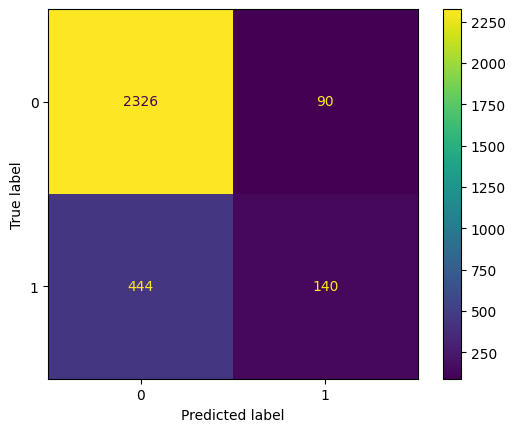

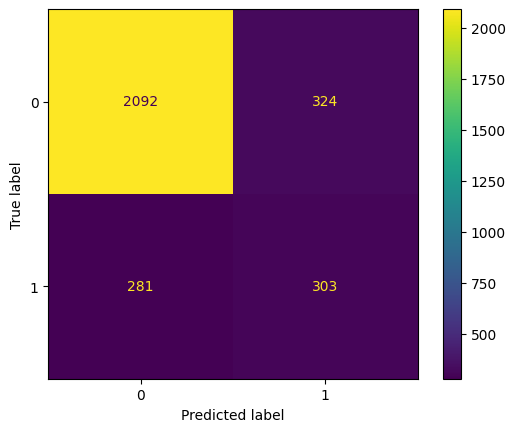

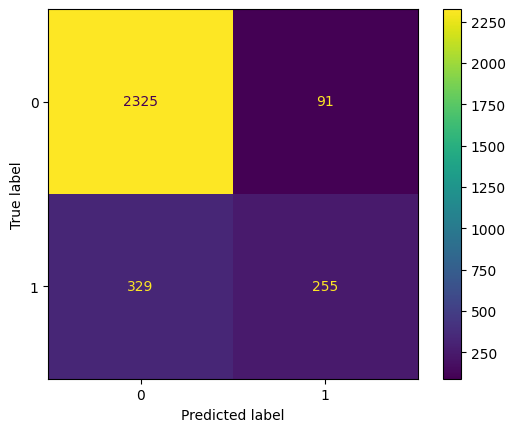

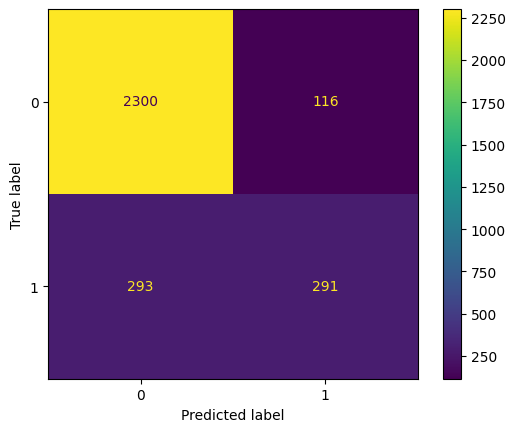

In [ ]:
for i in lst:
   print("model is",i)
   i.fit(x_train,y_train)
   y_pred=i.predict(x_test)
   print(classification_report(y_test,y_pred))
   print("Accuracy score of",i," ",accuracy_score(y_test,y_pred))
   labels=[0,1]
   result=confusion_matrix(y_test,y_pred)
   cmd=ConfusionMatrixDisplay(result,display_labels=labels)
   cmd.plot()
   print("*"*1000)






*   XGB classifier Model seems to have the highest accuracy. This model may be a good choice for predicting customer churn.








            Algorithms  Accuracy
0  Logistic Regression      82.2
1        Decision Tree      79.3
2        Random Forest      85.6
3                 XGB       86.3


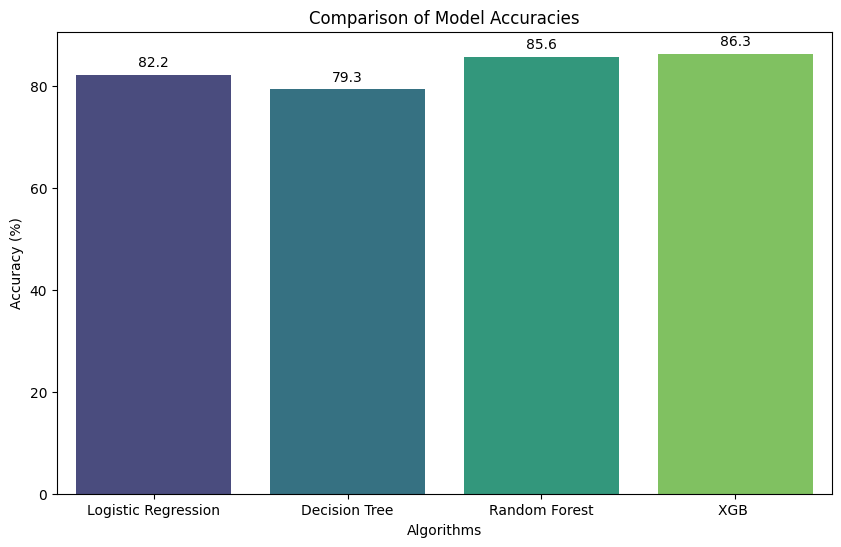

In [ ]:

# Define the algorithms and their accuracy scores
alg = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGB ']
accuracy_scores = [0.822, 0.793, 0.856, 0.863]

# Create the DataFrame
metrics_df = pd.DataFrame({'Algorithms': alg, 'Accuracy': accuracy_scores})

# Multiply the scores by 100 to get percentage
metrics_df['Accuracy'] *= 100

# Print the DataFrame
print(metrics_df)

# Plotting the bar graph using seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Algorithms', y='Accuracy', data=metrics_df, palette='viridis')

# Add title and labels
plt.title('Comparison of Model Accuracies')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')

# Annotate the bars with accuracy scores
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

# Show the plot
plt.show()


In [ ]:
#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
random_parameters =  {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
clf1=GridSearchCV(xgb,random_parameters,cv=10,scoring='accuracy')
clf1.fit(x_train,y_train)
print(clf1.best_params_)

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


In [ ]:
xgb1=XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.7)
xgb1.fit(x_train,y_train)
y_pred1=xgb1.predict(x_test)
y_pred1
print("accuracy score is",accuracy_score(y_test,y_pred1))

accuracy score is 0.8726666666666667
